In [2]:
import pandas as pd
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train = train.drop(columns= ['Id','PoolQC','Fence','MiscFeature','FireplaceQu','Alley'])
train = train.dropna()
train_y = train['SalePrice']
train = train.drop(columns='SalePrice')

<AxesSubplot:>

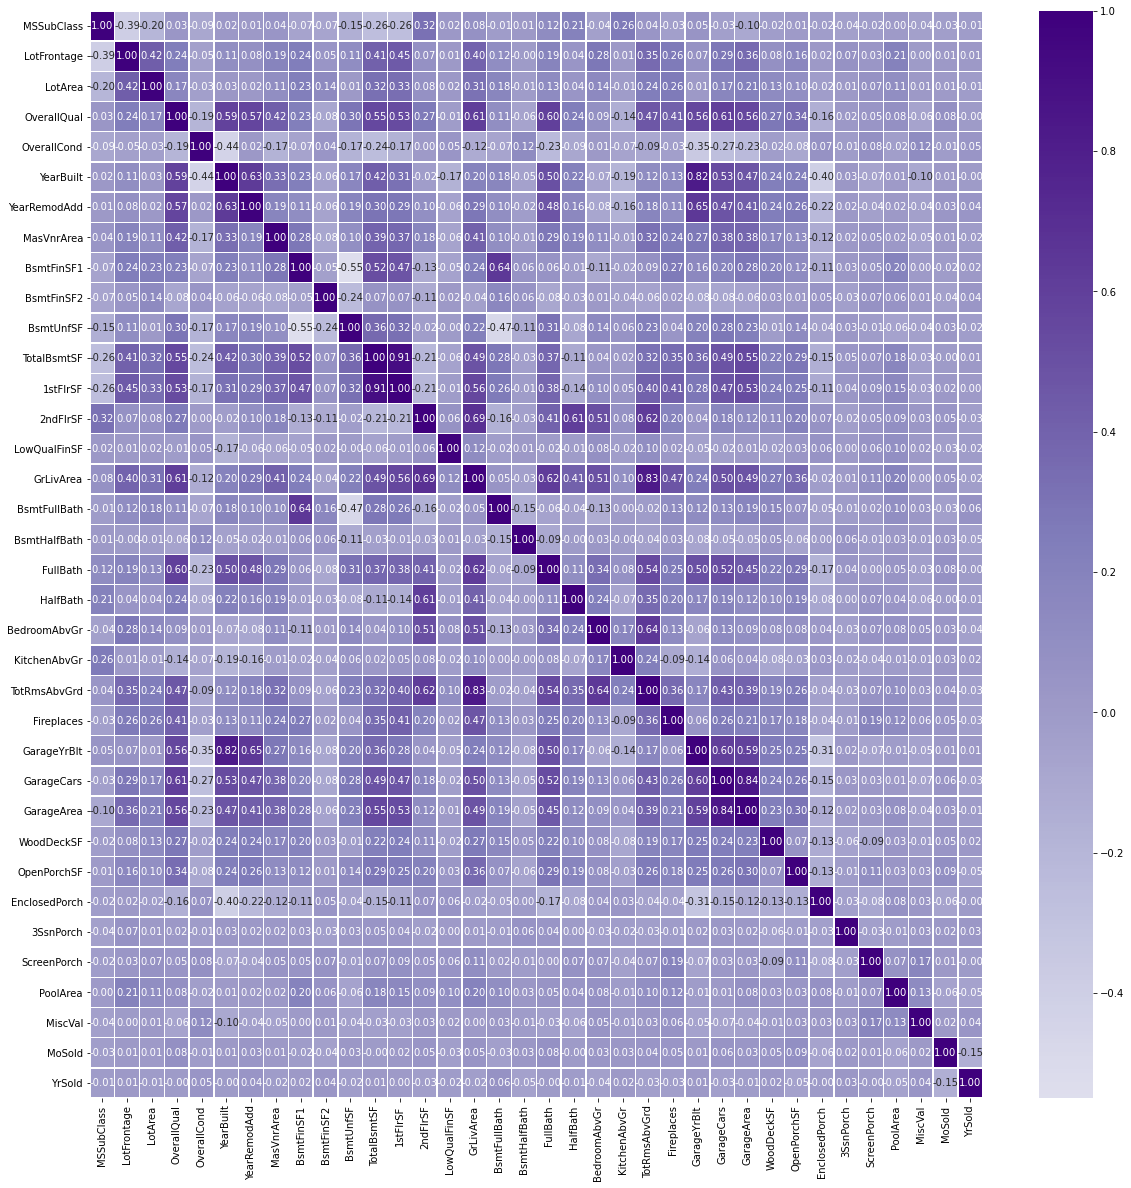

In [5]:
import seaborn as sea
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sea.heatmap(train.corr('pearson'),center = 0,cmap = 'Purples',annot = True,fmt='.2f',linewidths=0.5)


In [6]:
import numpy as np
col_name = train.corr().columns
col_num = train.corr().shape[0]
del_name = []
for i in range(col_num) :
    for j in range(i+1,col_num) :
        if np.abs(train.corr().iloc[i,j]) >0.7 :
            del_name.append((col_name[i],col_name[j]))
del_name

[('YearBuilt', 'GarageYrBlt'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GarageCars', 'GarageArea')]

In [7]:
for i in del_name :
    train = train.drop(columns= [i[0]])

<AxesSubplot:>

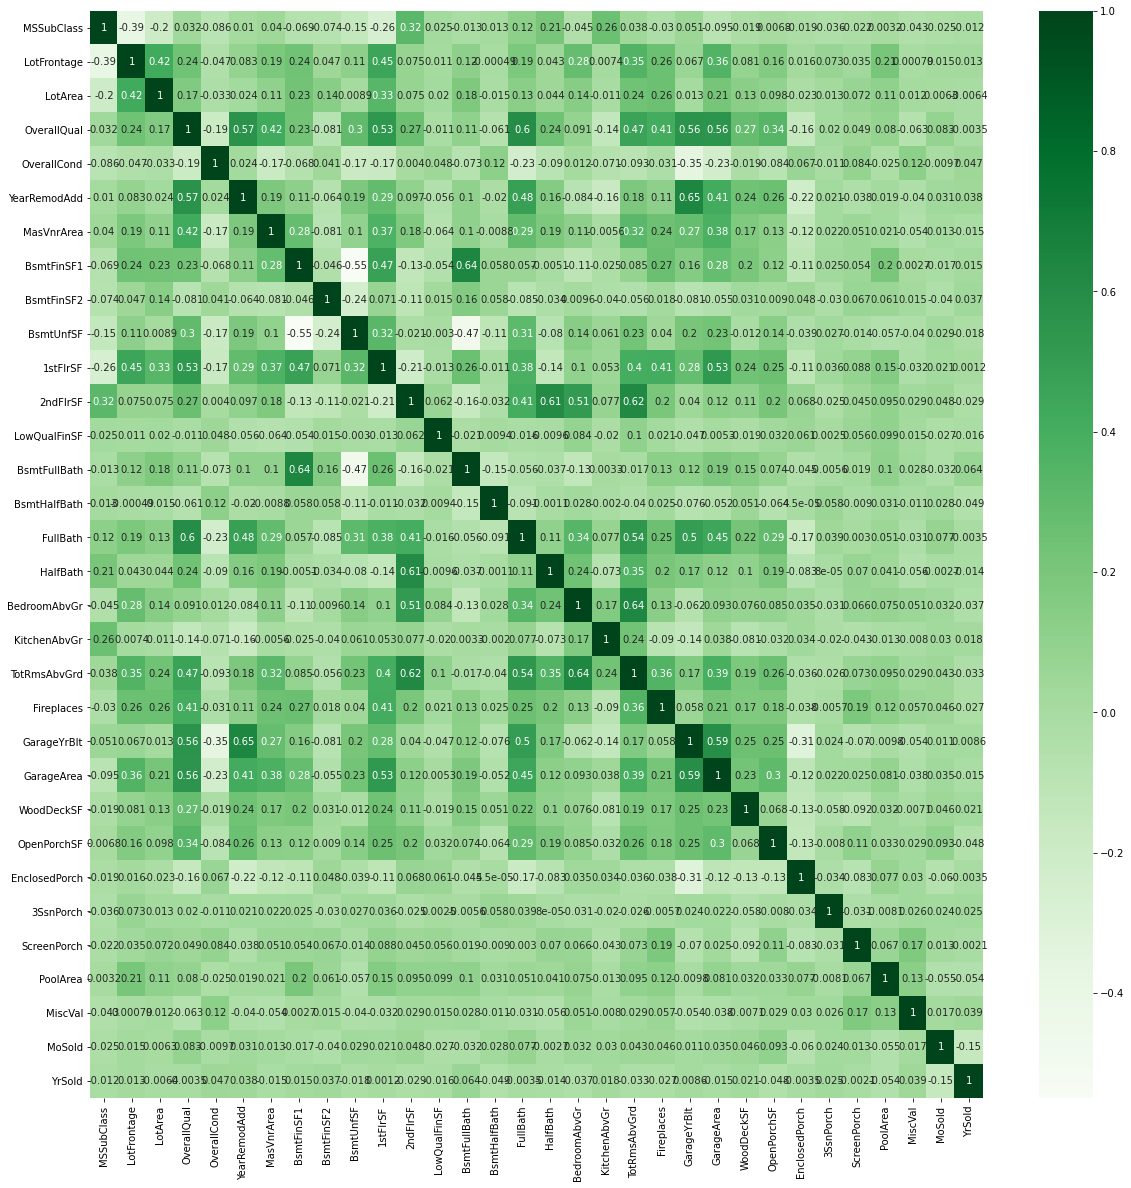

In [8]:
plt.figure(figsize=(20,20))
sea.heatmap(train.corr(),cmap='Greens',annot=True)

In [9]:
train = pd.get_dummies(train)
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,train_y)


In [11]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor(max_depth = 6)
dtr.fit(x_train,y_train)
est_mse = np.sum(np.square(dtr.predict(x_test)-y_test))
train_mse = np.sum(np.square(dtr.predict(x_train)-y_train))
print(est_mse)
print(train_mse)
print(train_mse/est_mse)

485477018031.12286
486498474369.19507
1.0021040261436365


[Text(683.265306122449, 1009.5428571428572, 'X[3] <= 7.5\nmse = 7024741660.312\nsamples = 820\nvalue = 188195.007'),
 Text(364.40816326530614, 854.2285714285715, 'X[3] <= 6.5\nmse = 2342552534.299\nsamples = 673\nvalue = 161132.149'),
 Text(182.20408163265307, 698.9142857142858, 'X[15] <= 1.5\nmse = 1197996192.209\nsamples = 468\nvalue = 141638.797'),
 Text(91.10204081632654, 543.6, 'X[10] <= 1050.5\nmse = 792077844.037\nsamples = 328\nvalue = 130754.655'),
 Text(45.55102040816327, 388.28571428571433, 'X[201] <= 0.5\nmse = 609276471.884\nsamples = 189\nvalue = 119390.37'),
 Text(22.775510204081634, 232.97142857142865, 'X[11] <= 641.0\nmse = 435607732.288\nsamples = 166\nvalue = 123993.807'),
 Text(11.387755102040817, 77.65714285714284, 'mse = 326633934.398\nsamples = 146\nvalue = 120087.164'),
 Text(34.163265306122454, 77.65714285714284, 'mse = 306400461.21\nsamples = 20\nvalue = 152512.3'),
 Text(68.32653061224491, 232.97142857142865, 'X[32] <= 0.5\nmse = 605875752.767\nsamples = 23\n

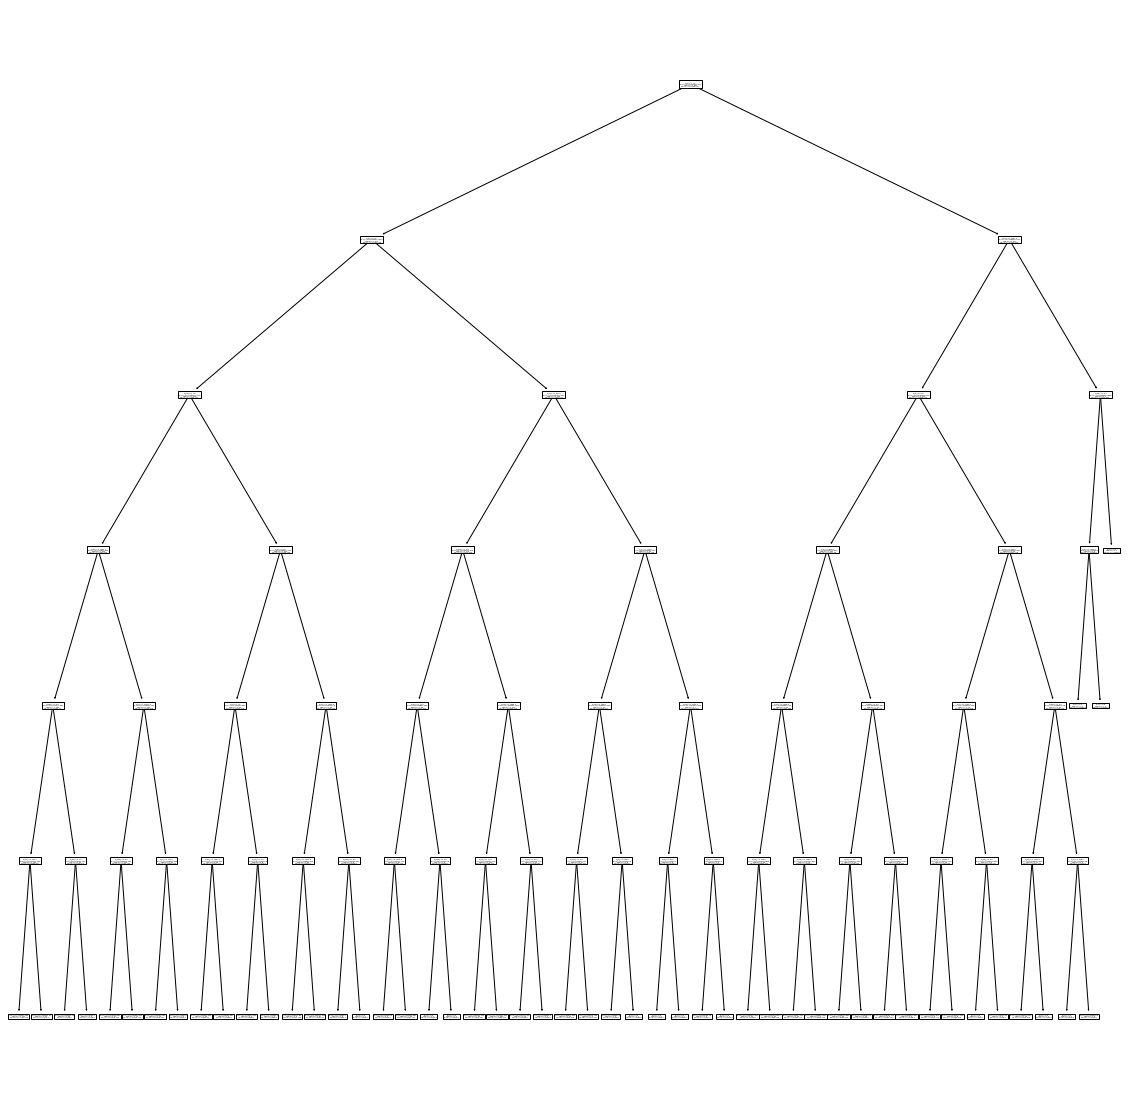

In [12]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtr)

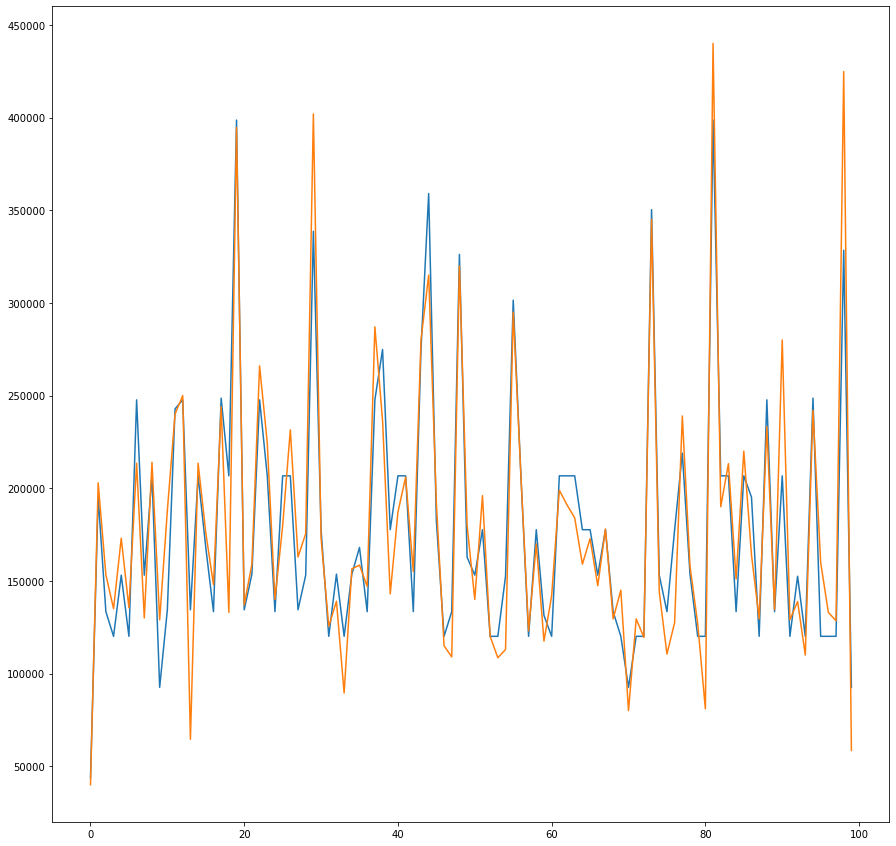

In [19]:
%matplotlib inline 
plt.figure(figsize=(15,15))
plt.plot(np.arange(100),dtr.predict(x_train)[:100])
plt.plot(np.arange(100),y_train[:100])
plt.show()


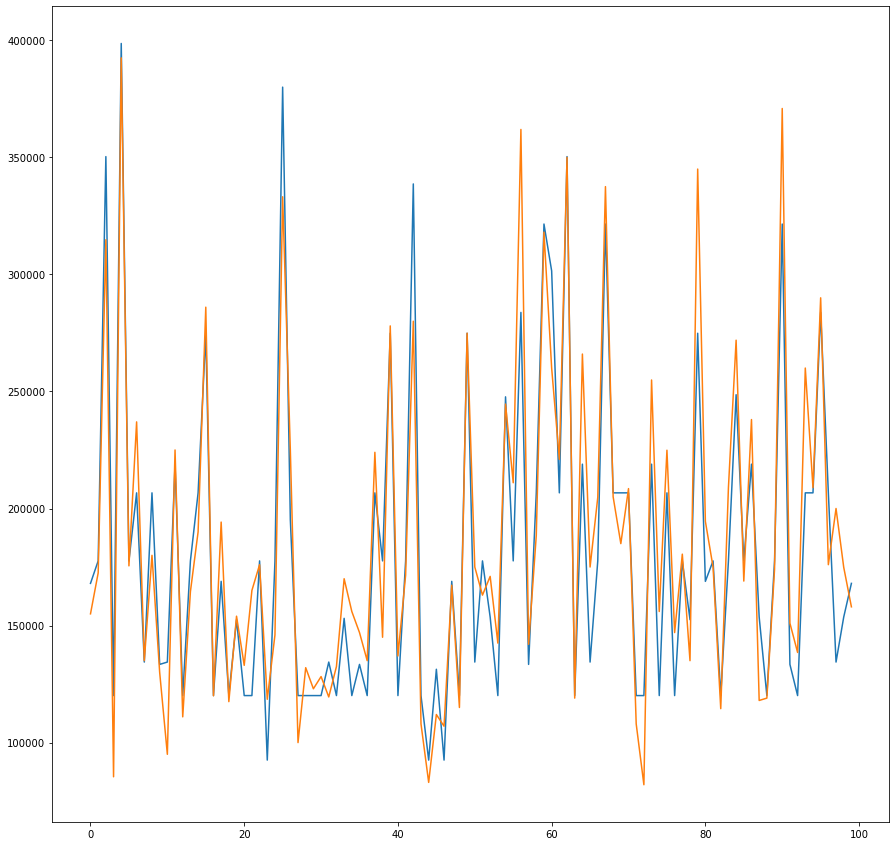

In [18]:
plt.figure(figsize=(15,15))
plt.plot(np.arange(100),dtr.predict(x_test)[:100])
plt.plot(np.arange(100),y_test[:100])